In [26]:
import pandas as pd
import numpy as np

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import os

In [60]:
train_load_data = pd.read_csv('./data/preprocessed_train_load_data.csv')
temp_data = pd.read_csv('./data/temperature_history.csv')

In [84]:
temp_data.isnull().sum()

station_id                         0
year                               0
month                              0
day                                0
h1                                 0
h2                                 0
h3                                 0
h4                                 0
h5                                 0
h6                                 0
h7                                11
h8                                11
h9                                11
h10                               11
h11                               11
h12                               11
h13                               11
h14                               11
h15                               11
h16                               11
h17                               11
h18                               11
h19                               11
h20                               11
h21                               11
h22                               11
h23                               11
h

In [62]:
# temp 
train_temp_data = temp_data.loc[~temp_data['h7'].isna()]
test_temp_data = temp_data.loc[temp_data['h7'].isna()]

In [66]:
hours = [f'h{hour}' for hour in range(1,24+1)]
for hour in hours: 
    temp_data[f"{hour}_stationid_month_day_median"] = temp_data.groupby(['station_id', 'month', 'day'])[f"{hour}"].transform("median")

In [88]:
# replace null value with median 
temp_data.loc[temp_data['h7'].isna()]

,station_id,year,month,day,h1,h2,h3,h4,h5,h6,...,h15_stationid_month_day_median,h16_stationid_month_day_median,h17_stationid_month_day_median,h18_stationid_month_day_median,h19_stationid_month_day_median,h20_stationid_month_day_median,h21_stationid_month_day_median,h22_stationid_month_day_median,h23_stationid_month_day_median,h24_stationid_month_day_median
1642,1,2008,6,30,74,74,74,74,74,75,...,80.5,81.0,81.0,80.0,77.5,75.0,72.5,73.0,72.0,71.0
3285,2,2008,6,30,66,65,64,64,64,63,...,78.5,80.0,80.0,80.0,79.0,76.5,71.5,68.5,65.5,66.0
4928,3,2008,6,30,77,76,76,75,75,74,...,81.0,80.5,81.0,80.5,79.5,77.0,71.5,68.5,67.5,65.5
6571,4,2008,6,30,72,72,72,72,72,71,...,85.5,86.0,85.0,84.0,82.5,79.0,74.5,74.0,72.5,72.0
8214,5,2008,6,30,73,74,74,73,72,72,...,82.0,82.5,81.5,81.5,80.0,76.0,72.5,70.0,70.0,68.0
9857,6,2008,6,30,70,70,70,70,70,68,...,82.5,83.5,83.5,82.0,80.0,77.5,73.5,73.5,70.5,71.5
11500,7,2008,6,30,74,73,72,71,71,71,...,84.5,85.0,85.0,84.0,82.5,80.0,76.0,73.0,71.0,70.5
13143,8,2008,6,30,72,71,71,71,70,71,...,84.0,84.5,84.5,83.5,82.5,77.5,73.0,72.0,70.5,68.5
14786,9,2008,6,30,75,72,72,69,69,69,...,82.5,83.0,83.0,82.5,81.5,78.0,72.5,71.0,71.0,70.0
16429,10,2008,6,30,70,70,70,70,70,70,...,82.5,83.5,83.0,82.5,80.5,77.5,74.0,73.0,71.0,71.0


In [91]:
# bad code but for now: use median as temp values
median_df_cols = [f'h{hour}_stationid_month_day_median' for hour in range(1,24+1)] + ['year', 'month', 'day', 'station_id']
temp_data_median = temp_data[median_df_cols]

# approach for grouping temp to load history

- do it by date first -> might not be feasable if dates are not unique
    - to try and fix this we can make some assumption based the station

In [31]:
date_cols_list = ['year', 'month', 'day']
train_temp_data['datetime'] = pd.to_datetime(train_temp_data[date_cols_list])
train_temp_data['weekday'] = train_temp_data['datetime'].dt.dayofweek
train_temp_data['week_of_year'] = train_temp_data['datetime'].dt.weekofyear
train_temp_data['day_of_year'] = train_temp_data['datetime'].dt.dayofyear
train_temp_data['is_month_start'] = (train_temp_data['datetime'].dt.is_month_start).astype(int) 
train_temp_data['is_month_end'] = (train_temp_data['datetime'].dt.is_month_end).astype(int) 

c:\users\faroo\documents\kaggle_project\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\faroo\documents\kaggle_project\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\faroo\documents\kaggle_project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [32]:
train_temp_data['datetime'].value_counts().head()

2008-02-04    11
2006-04-17    11
2004-06-17    11
2005-08-08    11
2007-11-20    11
Name: datetime, dtype: int64

In [33]:
# rename hour cols for concatenation
hours = [f'h{hour}' for hour in range(1,24+1)]
load_hour_rename = [f'load_h{hour}' for hour in range(1,24+1)]
temp_hour_rename = [f'temp_h{hour}' for hour in range(1,24+1)]
load_columns_rename_dict = {}
for hour, rename in zip(hours, load_hour_rename): 
    load_columns_rename_dict[hour] = rename
    
temp_columns_rename_dict = {}
for hour, rename in zip(hours, temp_hour_rename): 
    temp_columns_rename_dict[hour] = rename
    
train_load_data = train_load_data.rename(columns=load_columns_rename_dict)
train_temp_data = train_temp_data.rename(columns=temp_columns_rename_dict)

In [34]:
train_load_data.head()

,zone_id,year,month,day,load_h1,load_h2,load_h3,load_h4,load_h5,load_h6,...,h24_day_median,h24_day_sum,h24_day_mean,h24_month_day_median,h24_month_day_sum,h24_month_day_mean,h24_zoneid_month_day_median,h24_zoneid_month_day_sum,h24_zoneid_month_day_mean,station_id
0,1,2004,1,1,16853.0,16450.0,16517.0,16873.0,17064.0,17727.0,...,58610.0,78749021.0,73597.215888,66942.0,7549053.0,75490.53,17250.0,89957.0,17991.4,10
1,1,2004,1,2,14155.0,14038.0,14019.0,14489.0,14920.0,16072.0,...,60906.5,78794426.0,75042.310476,67191.0,8587917.0,85879.17,18229.0,101666.0,20333.2,10
2,1,2004,1,3,14439.0,14272.0,14109.0,14081.0,14775.0,15491.0,...,61940.0,78102518.0,74383.350476,63355.0,8251179.0,82511.79,16323.0,90548.0,18109.6,10
3,1,2004,1,4,11273.0,10415.0,9943.0,9859.0,9881.0,10248.0,...,61296.5,78262730.0,74535.933333,61578.0,7611001.0,76110.01,13952.0,78456.0,15691.2,10
4,1,2004,1,5,10750.0,10321.0,10107.0,10065.0,10419.0,12101.0,...,60558.0,78902221.0,75144.972381,62079.5,7510222.0,75102.22,16018.0,76957.0,15391.4,10


In [35]:
train_load_data['zone_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [36]:
train_temp_data.head()

,station_id,year,month,day,temp_h1,temp_h2,temp_h3,temp_h4,temp_h5,temp_h6,...,temp_h21,temp_h22,temp_h23,temp_h24,datetime,weekday,week_of_year,day_of_year,is_month_start,is_month_end
0,1,2004,1,1,46,46,45,41,39,35,...,39.0,38.0,40.0,41.0,2004-01-01,3,1,1,1,0
1,1,2004,1,2,43,44,46,46,47,47,...,46.0,45.0,45.0,45.0,2004-01-02,4,1,2,0,0
2,1,2004,1,3,45,46,46,44,43,46,...,62.0,63.0,63.0,62.0,2004-01-03,5,1,3,0,0
3,1,2004,1,4,63,62,62,62,60,60,...,65.0,64.0,65.0,64.0,2004-01-04,6,1,4,0,0
4,1,2004,1,5,64,63,65,64,64,64,...,52.0,49.0,47.0,47.0,2004-01-05,0,2,5,0,0


In [37]:
train_temp_data['station_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

# Distribution of Temp Data

In [13]:
save_figures = True

In [14]:
def create_dir(file_path):
    directory = os.path.dirname(file_path)
    print(os.listdir('.'))
    if not os.path.exists(directory):
        os.makedirs(directory)
        print('dir for graphs made')
    else: 
        print("dir already exists")
        
graphs_file_path = './graphs'
create_dir(graphs_file_path)

['.ipynb_checkpoints', 'data', 'graphs', 'keras_training', 'keras_training.ipynb', 'model_analysis_load_only.ipynb', 'visualization_preprocessing_load_temp_hist.ipynb', 'visualization_preprocess_load_history.ipynb']
dir already exists


In [15]:
train_temp_data.shape[0]

18062

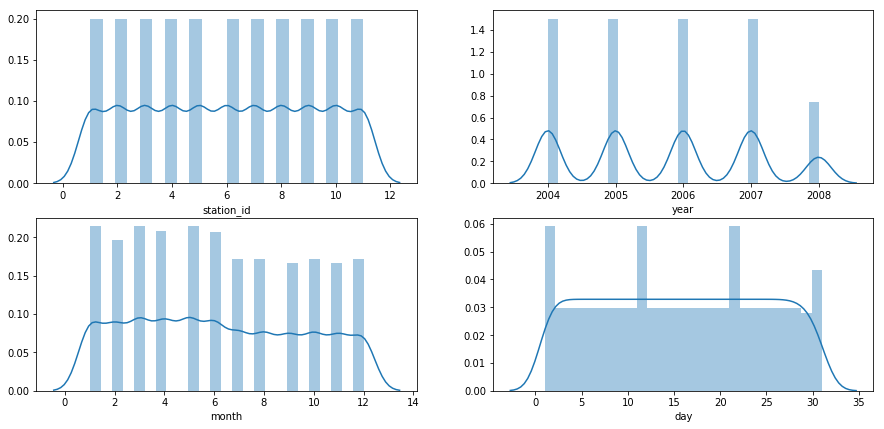

In [16]:
fig, axes = plt.subplots(2,2, figsize=(15,7))

sns.distplot(train_temp_data['station_id'], ax=axes[0,0])
sns.distplot(train_temp_data['year'], ax=axes[0,1])
sns.distplot(train_temp_data['month'], ax=axes[1,0])
sns.distplot(train_temp_data['day'], ax=axes[1,1])

if save_figures:
    fig.savefig(f'{graphs_file_path}/distribution_of_temp_data.png')

### trends 
- should be the same at the load history data because we want temp to be one to one on the number of days

# compare zone_id with station_id

In [17]:
# zone_id of 4, 8 and 5 are excluded
excluded_zone_dt = train_load_data.loc[train_load_data['zone_id']!=4]
excluded_zone_dt = excluded_zone_dt.loc[train_load_data['zone_id']!=5]
excluded_zone_dt = excluded_zone_dt.loc[train_load_data['zone_id']!=8]

In [18]:
excluded_zone_dt['zone_id'].unique()

array([ 1,  2,  3,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int64)

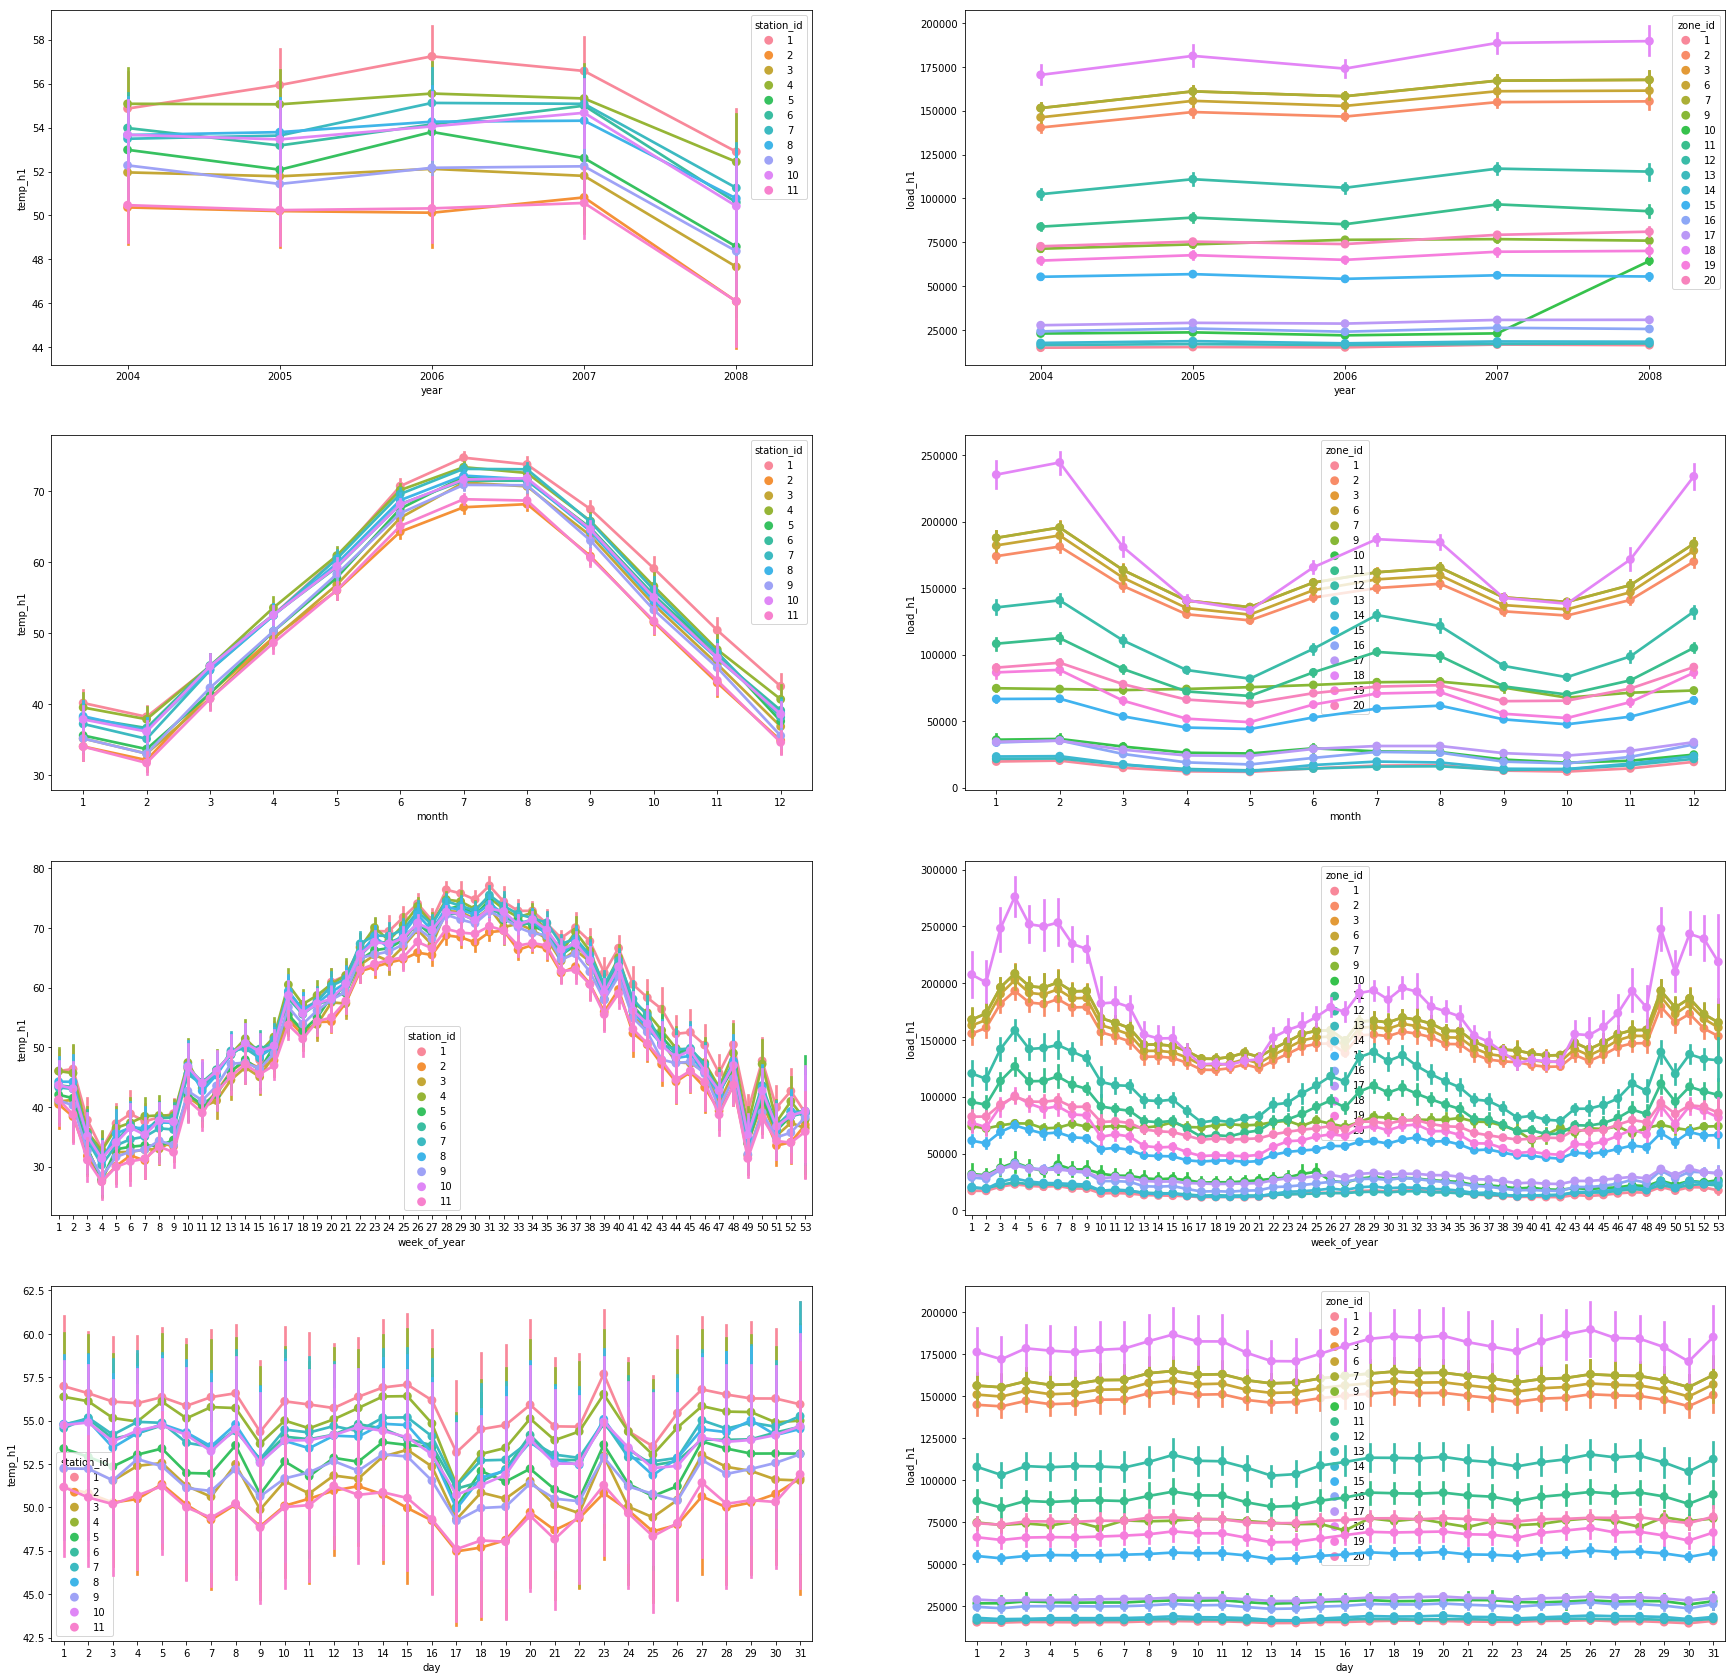

In [19]:
fig, axes = plt.subplots(4,2, figsize=(30,30))

sns.pointplot(x='year', y='temp_h1', hue="station_id",  err_style=None, data=train_temp_data, ax=axes[0,0])
sns.pointplot(x='year', y='load_h1', hue="zone_id",  err_style=None, data=excluded_zone_dt, ax=axes[0,1])

sns.pointplot(x='month', y='temp_h1', hue="station_id",  err_style=None, data=train_temp_data, ax=axes[1,0])
sns.pointplot(x='month', y='load_h1', hue="zone_id",  err_style=None, data=excluded_zone_dt, ax=axes[1,1])

sns.pointplot(x='week_of_year', y='temp_h1', hue="station_id",  err_style=None, data=train_temp_data, ax=axes[2,0])
sns.pointplot(x='week_of_year', y='load_h1', hue="zone_id",  err_style=None, data=excluded_zone_dt, ax=axes[2,1])

sns.pointplot(x='day', y='temp_h1', hue="station_id",  err_style=None, data=train_temp_data, ax=axes[3,0])
sns.pointplot(x='day', y='load_h1', hue="zone_id",  err_style=None, data=excluded_zone_dt, ax=axes[3,1])

if save_figures:
    fig.savefig(f'{graphs_file_path}/hour1_station_zone_comparison.png')

### compare i'th station with j'th zone for k'th hour

In [20]:
specific_station_dt = train_temp_data.loc[train_temp_data['station_id']==1]
specific_zone_dt = train_load_data.loc[train_load_data['zone_id']==1]

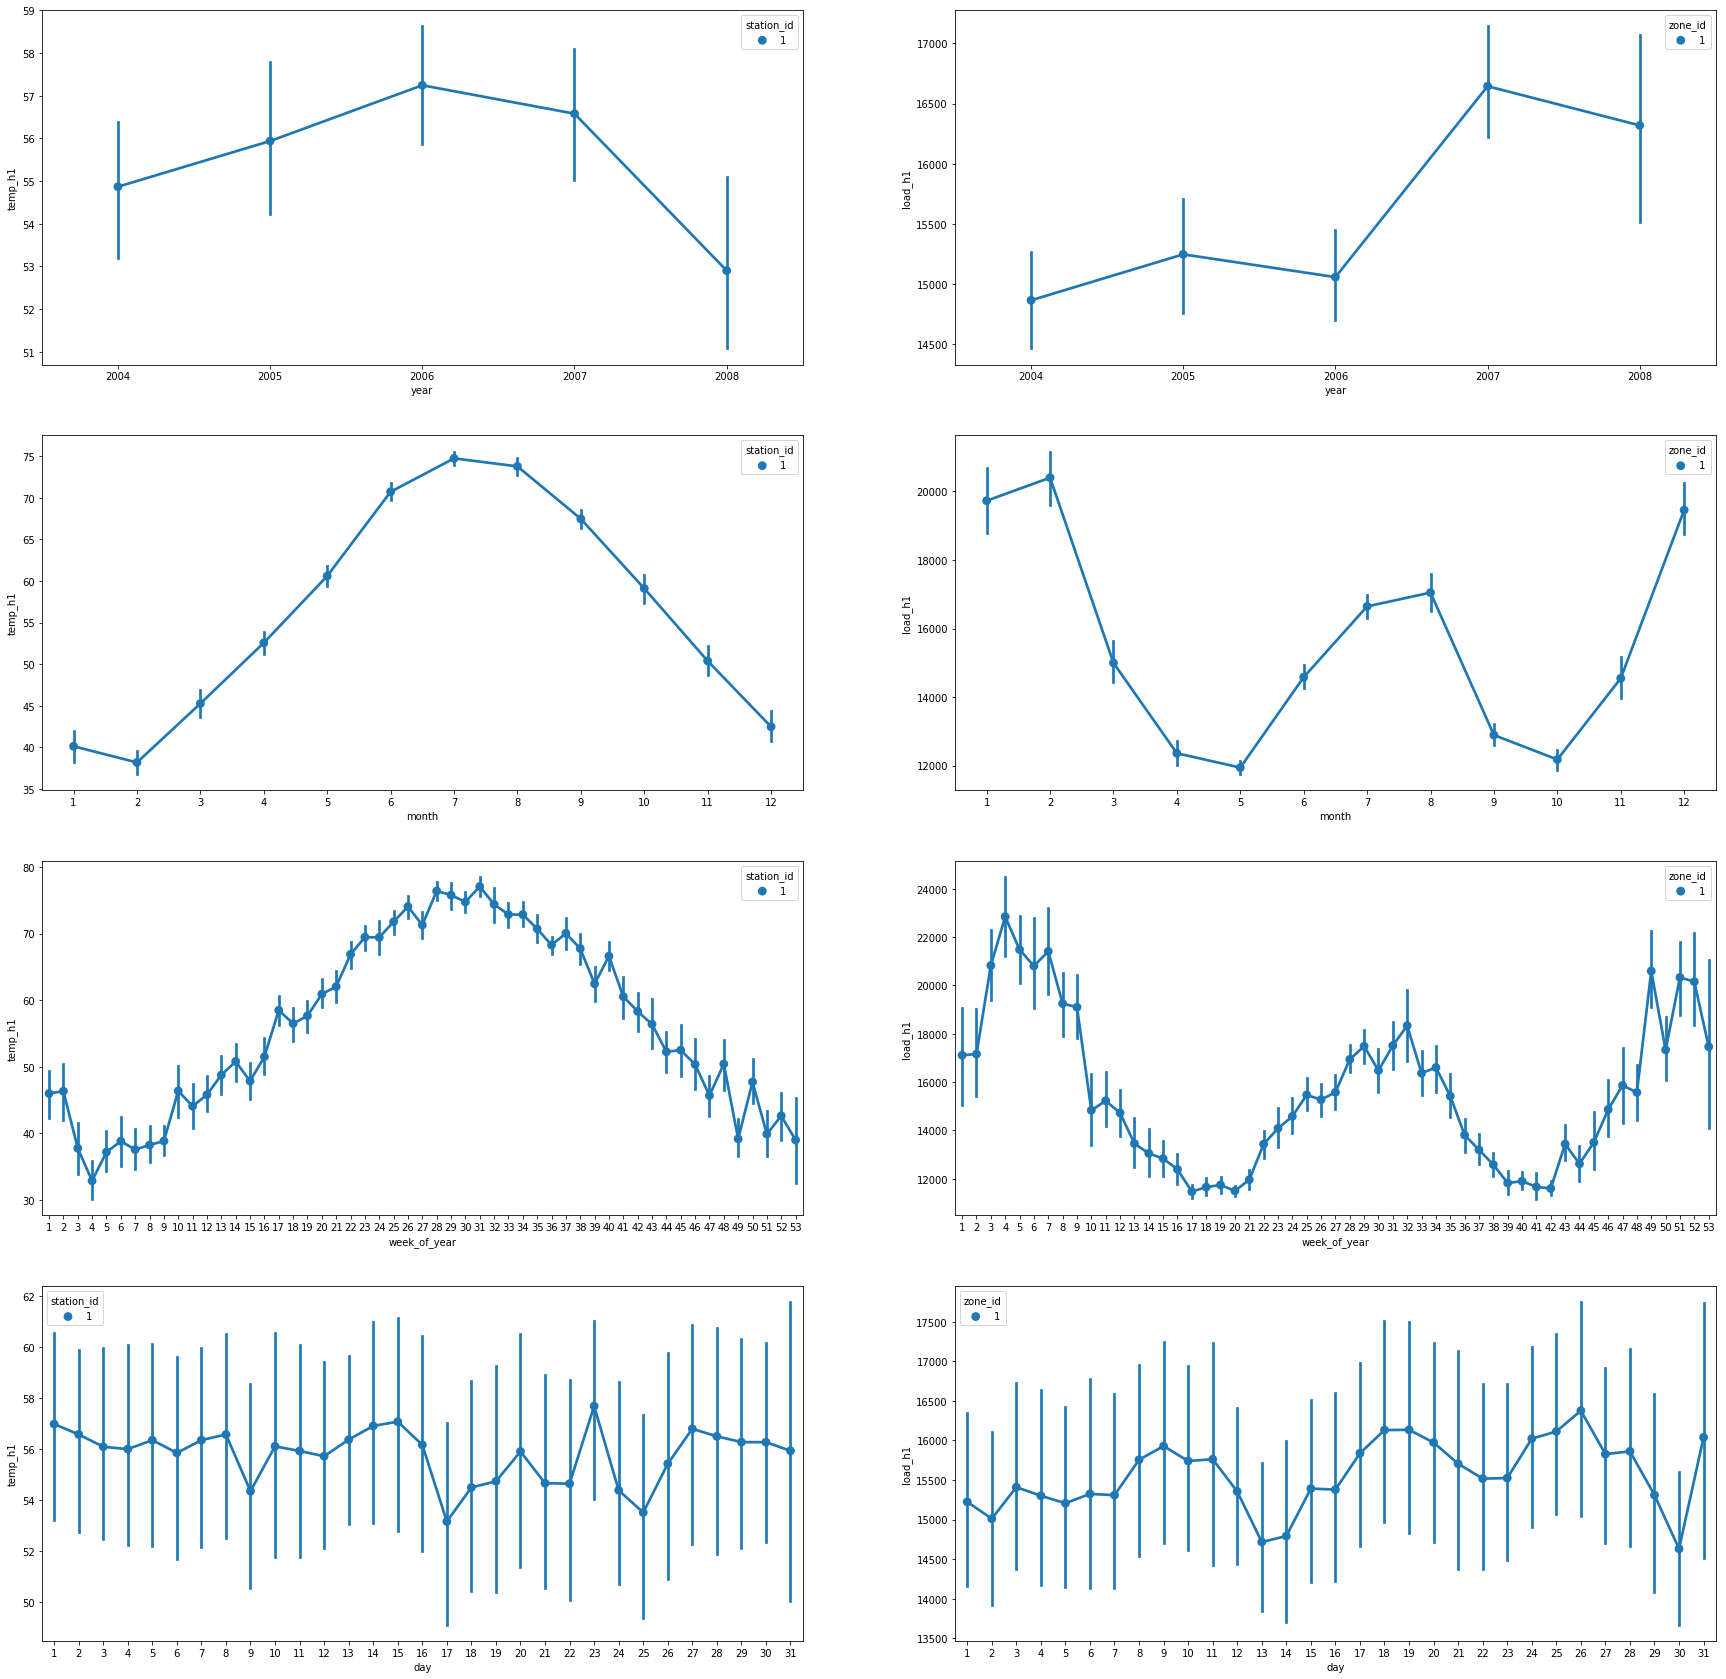

In [21]:
fig, axes = plt.subplots(4,2, figsize=(30,30))

sns.pointplot(x='year', y='temp_h1', hue="station_id", data=specific_station_dt, ax=axes[0,0])
sns.pointplot(x='year', y='load_h1', hue="zone_id",  err_style=None, data=specific_zone_dt, ax=axes[0,1])

sns.pointplot(x='month', y='temp_h1', hue="station_id",  err_style=None, data=specific_station_dt, ax=axes[1,0])
sns.pointplot(x='month', y='load_h1', hue="zone_id",  err_style=None, data=specific_zone_dt, ax=axes[1,1])

sns.pointplot(x='week_of_year', y='temp_h1', hue="station_id",  err_style=None, data=specific_station_dt, ax=axes[2,0])
sns.pointplot(x='week_of_year', y='load_h1', hue="zone_id",  err_style=None, data=specific_zone_dt, ax=axes[2,1])

sns.pointplot(x='day', y='temp_h1', hue="station_id",  err_style=None, data=specific_station_dt, ax=axes[3,0])
sns.pointplot(x='day', y='load_h1', hue="zone_id",  err_style=None, data=specific_zone_dt, ax=axes[3,1])

if save_figures:
    fig.savefig(f'{graphs_file_path}/zone1_station1_hour1_year_month_weekofyear_day.png')

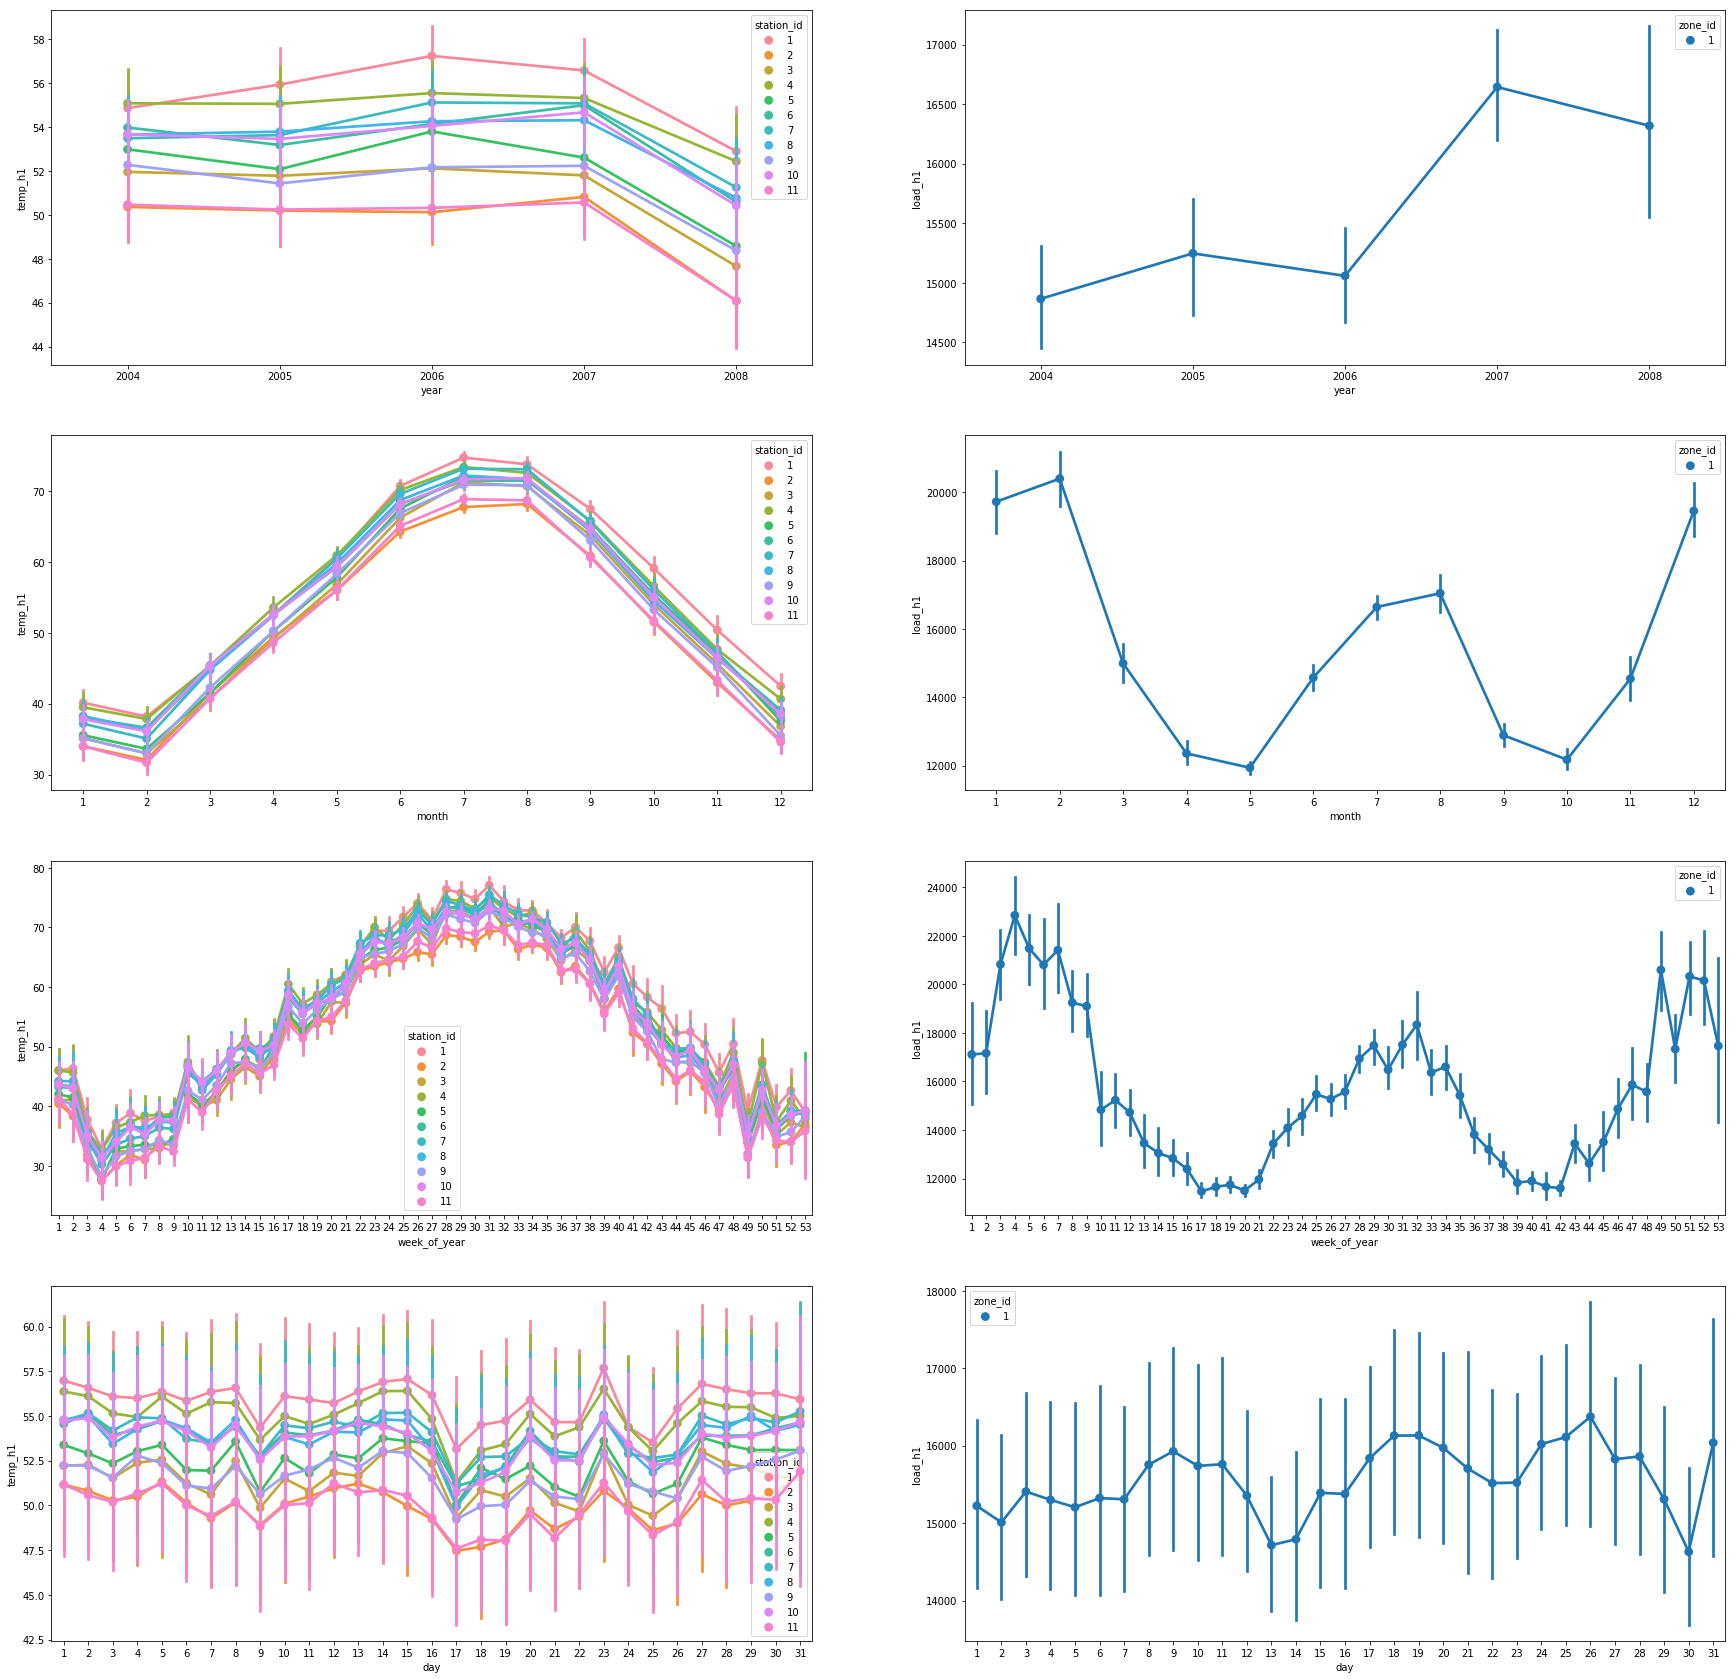

In [22]:
fig, axes = plt.subplots(4,2, figsize=(30,30))

sns.pointplot(x='year', y='temp_h1', hue="station_id", data=train_temp_data, ax=axes[0,0])
sns.pointplot(x='year', y='load_h1', hue="zone_id",  err_style=None, data=specific_zone_dt, ax=axes[0,1])

sns.pointplot(x='month', y='temp_h1', hue="station_id",  err_style=None, data=train_temp_data, ax=axes[1,0])
sns.pointplot(x='month', y='load_h1', hue="zone_id",  err_style=None, data=specific_zone_dt, ax=axes[1,1])

sns.pointplot(x='week_of_year', y='temp_h1', hue="station_id",  err_style=None, data=train_temp_data, ax=axes[2,0])
sns.pointplot(x='week_of_year', y='load_h1', hue="zone_id",  err_style=None, data=specific_zone_dt, ax=axes[2,1])

sns.pointplot(x='day', y='temp_h1', hue="station_id",  err_style=None, data=train_temp_data, ax=axes[3,0])
sns.pointplot(x='day', y='load_h1', hue="zone_id",  err_style=None, data=specific_zone_dt, ax=axes[3,1])


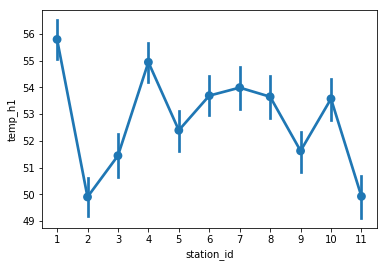

In [43]:
sns.pointplot(x='station_id', y='temp_h1', data=train_temp_data)

- station based on temperature: 
    - station 1
    - station 4
    - station 7
    - station 6
    - station 8
    - station 10
    - station 5
    - station 9
    - station 3
    - station 2
    - station 11

# Combine load and temp data based on station and date

In [49]:
# add temperature data
def get_station_id(areas):
    for indx, area in enumerate(areas):
        if area == 1:
            if indx+1 == 1:
                return 1
            elif indx+1 == 2:
                return 4
            elif indx+1 == 3:
                return 7
            elif indx+1 == 4:
                return 6
            elif indx+1 == 5:
                return 8
            elif indx+1 == 6:
                return 10
            elif indx+1 == 7:
                return 5
            elif indx+1 == 8:
                return 9
            elif indx+1 == 9:
                return 3
            elif indx+1 == 10:
                return 2
            elif indx+1 == 11:
                return 11

areas = [f'area{area}' for area in range(1,11+1)]
train_load_data['station_id'] = train_load_data[areas].apply(get_station_id, axis=1)

In [50]:
train_load_data[['station_id', 'area1', 'area2','zone_id']].head()

,station_id,area1,area2,zone_id
0,2,0,0,1
1,2,0,0,1
2,2,0,0,1
3,2,0,0,1
4,2,0,0,1


In [92]:
temp_data_median.head()

,h1_stationid_month_day_median,h2_stationid_month_day_median,h3_stationid_month_day_median,h4_stationid_month_day_median,h5_stationid_month_day_median,h6_stationid_month_day_median,h7_stationid_month_day_median,h8_stationid_month_day_median,h9_stationid_month_day_median,h10_stationid_month_day_median,...,h19_stationid_month_day_median,h20_stationid_month_day_median,h21_stationid_month_day_median,h22_stationid_month_day_median,h23_stationid_month_day_median,h24_stationid_month_day_median,year,month,day,station_id
0,46.0,46.0,45.0,43.0,45.0,45.0,45.0,44.0,46.0,53.0,...,48.0,46.0,45.0,44.0,42.0,41.0,2004,1,1,1
1,43.0,44.0,46.0,45.0,45.0,45.0,46.0,45.0,46.0,47.0,...,49.0,47.0,46.0,45.0,45.0,45.0,2004,1,2,1
2,45.0,46.0,46.0,44.0,43.0,46.0,46.0,47.0,47.0,47.0,...,51.0,50.0,51.0,50.0,48.0,49.0,2004,1,3,1
3,50.0,50.0,51.0,52.0,52.0,50.0,51.0,52.0,54.0,57.0,...,54.0,51.0,51.0,47.0,47.0,47.0,2004,1,4,1
4,46.0,47.0,47.0,47.0,47.0,47.0,48.0,49.0,50.0,51.0,...,46.0,45.0,46.0,47.0,46.0,47.0,2004,1,5,1


In [106]:
temp_cols = ['station_id', 'year', 'month', 'day']     

def transfer_temp_data(data):
    data_stationid = data['station_id']
    data_day = data['day']
    data_month = data['month']
    
    temps = temp_data_median.loc[(temp_data_median['station_id'] == data_stationid) & (temp_data_median['month'] == data_month)& (temp_data_median['day'] == data_day)]
    
    return temps   


In [108]:
train_load_data[temp_cols].apply(transfer_temp_data, axis=1)

0               h1_stationid_month_day_median  h2_stati...
1               h1_stationid_month_day_median  h2_stati...
2               h1_stationid_month_day_median  h2_stati...
3               h1_stationid_month_day_median  h2_stati...
4               h1_stationid_month_day_median  h2_stati...
5               h1_stationid_month_day_median  h2_stati...
6               h1_stationid_month_day_median  h2_stati...
7               h1_stationid_month_day_median  h2_stati...
8               h1_stationid_month_day_median  h2_stati...
9               h1_stationid_month_day_median  h2_stati...
10              h1_stationid_month_day_median  h2_stati...
11              h1_stationid_month_day_median  h2_stati...
12              h1_stationid_month_day_median  h2_stati...
13              h1_stationid_month_day_median  h2_stati...
14              h1_stationid_month_day_median  h2_stati...
15              h1_stationid_month_day_median  h2_stati...
16              h1_stationid_month_day_median  h2_stati.